# 2020년의 세계 행복 보고서

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

#소수점 3자리까지 표시
%precision 3

'%.3f'

## 1) 데이터 일부 출력 후 전체 피쳐와 레코드 수 서술하기

In [2]:
#데이터 불러오기
d_data = pd.read_csv('2020.csv', encoding='cp949').iloc[:,0:13]
data = d_data.iloc[:,2:]

- 출처: https://www.kaggle.com/mathurinache/world-happiness-report/version/1?select=2020.csv

In [3]:
#앞에서부터 5행만 추출 
d_data.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317


In [4]:
#수치형 변수만 남기기
data.head(5)

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317
1,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317
2,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317
3,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317
4,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317


- Countryname: 나라 이름
- Regional indicator: 지역 지표
- Ladder score: 행복지수 (0~10)
- upperwhisker: 상단 기준치(Q3+1.5*IRQ)보다 작은 값 중 가장 큰 값
- lowerwhisker: 하단 이상치 기준(Q1-1.5*IRQ)보다 큰 값 중 가장 작은 값
- Logged GDP per capita: 1인당 GDP

In [5]:
#전체 피쳐와 레코드의 개수
print("전체 피쳐 개수 : ", len(data.columns)) 
print("전체 레코드의 개수: ", len(data))

전체 피쳐 개수 :  11
전체 레코드의 개수:  153


In [6]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00


## 2) 하나 이상의 변수에 대해 위치 추정값 중 2가지 이상을 구하고 비교하기

In [7]:
#Ladder score의 mean, median, trimmed mean
print(data['Ladder score'].mean())
print(data['Ladder score'].median())
print(stats.trim_mean(data['Ladder score'],0.1))

5.47323986284967
5.514999866
5.487776415130082


In [8]:
#Social supoort의 mean, median, trimmed mean
print(data['Social support'].mean())
print(data['Social support'].median())
print(stats.trim_mean(data['Social support'],0.1))

0.8087210684379081
0.829204142
0.8236602680406502


In [9]:
#Healthy life expectancy의 mean, median, trimmed mean
print(data['Healthy life expectancy'].mean())
print(data['Healthy life expectancy'].median())
print(stats.trim_mean(data['Healthy life expectancy'],0.1))

64.44552916509808
66.30514526
64.90494509455284


- 세 값이 비슷한 Ladder score과 Social support의 경우에는 최솟값과 최댓값의 차이가 적다
- 평균과 중간값의 차이가 큰 Healthy life expectancy의 경우 평균과도 큰 차이가 나는 값이 존재하여 이러한 모습을 나타내는 것으로 보인다

## 3) 하나 이상의 변수에 대해 변이의 추정값 2가지 이상을 구해 비교하기

In [10]:
#Ladder score의 표준편차와 평균절대편차 값 (여기서 mad는 평균절대편차가 아님)
print(data['Ladder score'].std())
print(data['Ladder score'].mad())

1.112270173678083
0.9095243130722369


In [11]:
#Social support의 표준편차와 평균절대편차 값
print(data['Social support'].std())
print(data['Social support'].mad())

0.12145326744019307
0.09526992585244999


In [12]:
#Healthy life expectancy의 표준편차와 평균절대편차 값
print(data['Healthy life expectancy'].std())
print(data['Healthy life expectancy'].mad())

7.057847634303703
5.810653119751367


- Ladder score과 Social support의 경우에는 중심에서 크게 벗어나는 값이 없기 때문에 표준편차와 평균절대편차의 차이가 크지않다.
- Healthy life expectancy의 경우에는 중심에서 크게 벗어나는 값이 존재하여 표준편차와 평균절대편차 사이의 차이가 큰 편이다.
- Healthy life expectancy outlier로 인한 문제점을 보완해주는 모습을 보인다

## 4) 데이터의 분포를 반영하는 기법을 3가지 이상 써보고 비교하기  

In [13]:
#Ladder score, Social support, Healthy life expectancy의 백분위수
print(data['Ladder score'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
print(data['Social support'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
print(data['Healthy life expectancy'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    3.53376
0.25    4.72410
0.50    5.51500
0.75    6.22850
0.95    7.29636
Name: Ladder score, dtype: float64
0.05    0.576803
0.25    0.737217
0.50    0.829204
0.75    0.906747
0.95    0.942388
Name: Social support, dtype: float64
0.05    51.511484
0.25    58.961712
0.50    66.305145
0.75    69.289192
0.95    73.643613
Name: Healthy life expectancy, dtype: float64


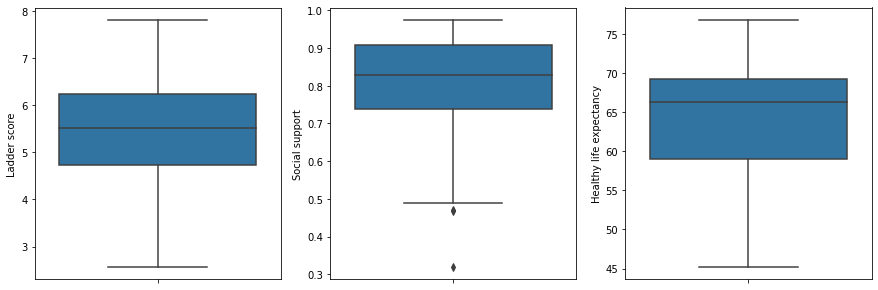

In [14]:
#Ladder score, Social support, Healthy life expectancy의 상자그림
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(ax=ax1,y = 'Ladder score', data = data)
sns.boxplot(ax=ax2,y = 'Social support', data = data)
sns.boxplot(ax=ax3, y = 'Healthy life expectancy',data=data)

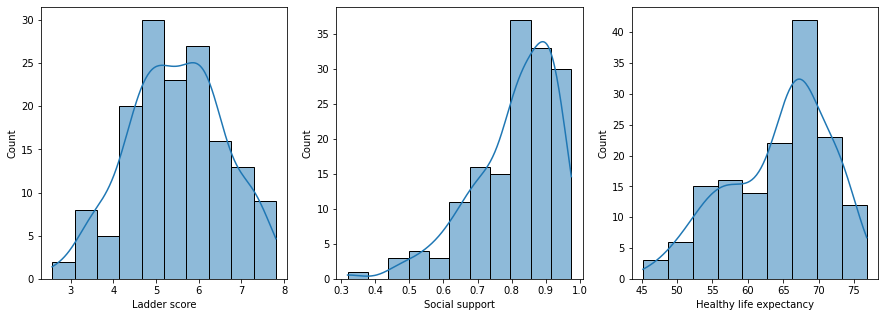

In [15]:
#Ladder score, Social support, Healthy life expectancy의 히스토그램
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.histplot(ax=ax1, x = data['Ladder score'], kde = True)
sns.histplot(ax=ax2, x = data['Social support'], kde = True)
sns.histplot(ax=ax3, x = data['Healthy life expectancy'], kde = True)

- 수치로 나타나는 백분위수에 비해 그림으로 시각화해주는 boxplot과 히스토그램이 데이터의 분포를 한눈에 알아보기 쉽다
- 2,3번에서 수치로만 보았을 때는 Ladder score보다 Social support의 값 차이가 적어 둘 다 outlier가 크게 없는 것 같지만 시각화를 통해 보니 Social supoort가 Healthy life expectancy보다 outlier가 눈에 띄는 것을 확인할 수 있다
- Social support의 값이 작은 값들로 이루어져 있어 다른 피쳐에 비해 outlier를 알아내기 어려웠던 것 같다.
- boxplot을 통해 Social support와 Healthy life expectancy의 경우 평균이 중간값보다 큰 값으로 치우쳐져 있는 것을 확인할 수 있다

## 5) 여러 변수 간의 상관행렬을 구하고 heat map 등으로 시각화하고 해석하기

In [16]:
#여러 변수 간의 correlation matrix
data.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
Ladder score,1.000000e+00,-4.464433e-01,9.995772e-01,9.996007e-01,7.753744e-01,7.650008e-01,7.703163e-01,5.905968e-01,6.904313e-02,-4.183051e-01,2.761262e-15
Standard error of ladder score,-4.464433e-01,1.000000e+00,-4.202380e-01,-4.715483e-01,-5.789263e-01,-5.158812e-01,-5.864704e-01,-2.924977e-01,7.274192e-02,3.035997e-01,-2.028613e-15
upperwhisker,9.995772e-01,-4.202380e-01,1.000000e+00,9.983566e-01,7.674834e-01,7.590122e-01,7.621089e-01,5.894104e-01,7.237907e-02,-4.143315e-01,-1.897447e-15
lowerwhisker,9.996007e-01,-4.715483e-01,9.983566e-01,1.000000e+00,7.824148e-01,7.702008e-01,7.776683e-01,5.912713e-01,6.574526e-02,-4.218278e-01,2.738435e-15
Logged GDP per capita,7.753744e-01,-5.789263e-01,7.674834e-01,7.824148e-01,1.000000e+00,7.818136e-01,8.484686e-01,4.190186e-01,-1.183994e-01,-3.347291e-01,1.434726e-15
Social support,7.650008e-01,-5.158812e-01,7.590122e-01,7.702008e-01,7.818136e-01,1.000000e+00,7.427441e-01,4.788632e-01,-5.678035e-02,-2.105296e-01,2.757347e-15
Healthy life expectancy,7.703163e-01,-5.864704e-01,7.621089e-01,7.776683e-01,8.484686e-01,7.427441e-01,1.000000e+00,4.488462e-01,-7.185211e-02,-3.538412e-01,-5.890844e-15
Freedom to make life choices,5.905968e-01,-2.924977e-01,5.894104e-01,5.912713e-01,4.190186e-01,4.788632e-01,4.488462e-01,1.000000e+00,2.537211e-01,-4.201445e-01,-9.230068e-16
Generosity,6.904313e-02,7.274192e-02,7.237907e-02,6.574526e-02,-1.183994e-01,-5.678035e-02,-7.185211e-02,2.537211e-01,1.000000e+00,-2.784802e-01,-2.158034e-17
Perceptions of corruption,-4.183051e-01,3.035997e-01,-4.143315e-01,-4.218278e-01,-3.347291e-01,-2.105296e-01,-3.538412e-01,-4.201445e-01,-2.784802e-01,1.000000e+00,6.095487e-17


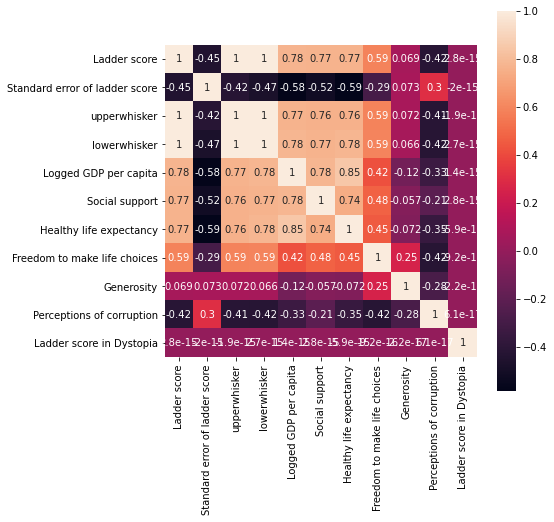

In [17]:
#여러 변수간의 correlation matrix을 시각화한 heat map
plt.figure(figsize=(7,7))
sns.heatmap(data = data.corr(), square = True, annot = True, cbar=True)
plt.show()

- 행복지수와 관련있는 지표들로 여러가지가 있는데 그 중 1인당 GDP, social support, Healthy life expectancy 와의 상관관계가 큰 것으로 보인다.
- 이 세 요소들은 서로 간에도 상관관계가 크게 나타난다

### 결론

- 수치자료로만 보았을 때는 outlier가 딱히 없어보여도 시각화를 통해 outlier를 찾아낼 수 있었기 때문에 위치추정값으로만 보기보다 boxplot이나 히스토그램으로 시각화하는 것이 더욱 적합했다.
- 그 중에서도 social support는 특히 히스토그램으로 나타내는 것이 가장 적절했다. boxplot에서는 outlier의 양이 한눈에 들어오지않는데 히스토그램으로 이를 나타낼 수 있었다.
- 세계 각 나라의 행복지수와 행복지수와 관련된 피쳐들의 상관관계를 알아보았을 때 1인당 GDP와 사회적 지원, 건강한 기대수명과 관련이 높다는 것을 알 수 있었다.
- Freedom to make life choices의 경우 행복지수와 상관관계가 0.59로 생각했던것 보다 낮았다. 이와 관련하여 예상치 못했는데 상관관계가 높은 피쳐와 높을것이라고 생각했는데 상관관계가 낮은 피쳐들을 더 알아보면 좋을 것 같다